In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("/content/drive/MyDrive/chbmit_preprocessed_data.csv")

In [5]:
df

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,...,-0.000036,0.000072,-0.000046,-0.000060,0.000070,-0.000169,0.000060,0.000070,0.000070,1.0
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,...,-0.000031,0.000087,-0.000049,-0.000067,0.000076,-0.000152,0.000068,0.000063,0.000063,1.0
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,...,-0.000033,0.000106,-0.000058,-0.000067,0.000075,-0.000145,0.000067,0.000062,0.000062,1.0
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,...,-0.000036,0.000107,-0.000073,-0.000073,0.000068,-0.000129,0.000073,0.000056,0.000056,1.0


In [6]:
Y=df["Outcome"]
df.drop(columns=["Outcome"],inplace=True)
X=df


In [7]:
X

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,FZ-CZ,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,3.380000e-05,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,3.070000e-05,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,2.910000e-05,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,2.830000e-05,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,2.910000e-05,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,...,4.100000e-06,-0.000036,0.000072,-0.000046,-0.000060,0.000070,-0.000169,0.000060,0.000070,0.000070
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,...,4.100000e-06,-0.000031,0.000087,-0.000049,-0.000067,0.000076,-0.000152,0.000068,0.000063,0.000063
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,...,-9.770000e-07,-0.000033,0.000106,-0.000058,-0.000067,0.000075,-0.000145,0.000067,0.000062,0.000062
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,...,-9.570000e-06,-0.000036,0.000107,-0.000073,-0.000073,0.000068,-0.000129,0.000073,0.000056,0.000056


In [8]:
from sklearn.preprocessing import StandardScaler

train_data, test_data, train_labels, test_labels = train_test_split(X,Y, test_size=0.2)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2)

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(train_data)

# Normalize the training data
X_train_norm = scaler.transform(train_data)
X_test_norm = scaler.transform(test_data)
X_val_norm=scaler.transform(val_data)



In [9]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision
from tensorflow.keras import regularizers


In [ ]:
import numpy as np
from hyperopt import fmin, tpe, hp

# Define the search space
space = {
    'units_layer1': hp.quniform('units_layer1', 16, 1024, 16),
    'units_layer2': hp.quniform('units_layer2', 16, 1024, 16),
    'units_layer3': hp.quniform('units_layer3', 16, 1024, 16),
    'units_layer4': hp.quniform('units_layer4', 16, 1024, 16),
    'units_layer5': hp.quniform('units_layer5', 16, 1024, 16),
    'units_layer6': hp.quniform('units_layer6', 16, 1024, 16),
    'units_layer7': hp.quniform('units_layer7', 16, 1024, 16),
    'units_layer8': hp.quniform('units_layer8', 16, 1024, 16),
    'units_layer9': hp.quniform('units_layer9', 16, 1024, 16),
    'dropout_rate': hp.uniform('dropout_rate', 0.0, 0.5),
    'learning_rate': hp.loguniform('learning_rate', -5, -1),
}

# Define the objective function
def objective(hyperparams):
    # Extract hyperparameters
    units_layer1 = int(hyperparams['units_layer1'])
    units_layer2 = int(hyperparams['units_layer2'])
    units_layer3 = int(hyperparams['units_layer3'])
    units_layer4 = int(hyperparams['units_layer4'])
    units_layer5 = int(hyperparams['units_layer5'])

    units_layer6 = int(hyperparams['units_layer6'])
    units_layer7 = int(hyperparams['units_layer7'])
    units_layer8 = int(hyperparams['units_layer8'])
    units_layer9 = int(hyperparams['units_layer9'])

    dropout_rate = hyperparams['dropout_rate']
    learning_rate = hyperparams['learning_rate']

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units_layer1, activation='relu', input_shape=(23,)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(units_layer2, activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(units_layer3, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),


        tf.keras.layers.Dense(units_layer4, activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(units_layer5, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Dense(units_layer6, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Dense(units_layer7, activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(units_layer8, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Dense(units_layer9, activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_norm,train_labels, validation_data=(X_val_norm,test_labels), epochs=20, batch_size=128, verbose=0)

    # Return the validation accuracy
    val_acc = history.history['val_accuracy'][-1]
    return {'loss': -val_acc, 'status': 'ok'}

# Perform Bayesian optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=2)

# Print the best hyperparameters
print('Best hyperparameters:', best)

100%|██████████| 2/2 [5:11:54<00:00, 9357.11s/trial, best loss: -0.4998339116573334]
Best hyperparameters: {'dropout_rate': 0.28048241879836683, 'learning_rate': 0.011464640531688787, 'units_layer1': 848.0, 'units_layer2': 944.0, 'units_layer3': 112.0, 'units_layer4': 64.0, 'units_layer5': 688.0, 'units_layer6': 720.0, 'units_layer7': 400.0, 'units_layer8': 304.0, 'units_layer9': 32.0}


In [ ]:
    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(848, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(944, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  
    tf.keras.layers.Dense(112, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(688,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(720,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(400,activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(304,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dropout(0.28),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])




In [ ]:
hist=model.fit(X_train_norm,train_labels, validation_data=(X_val_norm,val_labels), epochs=25, batch_size=128,verbose=1)

Epoch 1/25
10486/10486 [==============================] - 770s 73ms/step - loss: 0.3709 - accuracy: 0.8330 - val_loss: 0.3455 - val_accuracy: 0.8490
Epoch 2/25
10486/10486 [==============================] - 765s 73ms/step - loss: 0.3483 - accuracy: 0.8450 - val_loss: 0.3746 - val_accuracy: 0.8240
Epoch 3/25
10486/10486 [==============================] - 759s 72ms/step - loss: 0.3360 - accuracy: 0.8520 - val_loss: 2.3491 - val_accuracy: 0.8259
Epoch 4/25
10486/10486 [==============================] - 762s 73ms/step - loss: 0.3261 - accuracy: 0.8571 - val_loss: 3273.1890 - val_accuracy: 0.8333
Epoch 5/25
10486/10486 [==============================] - 760s 72ms/step - loss: 0.3214 - accuracy: 0.8597 - val_loss: 18.9451 - val_accuracy: 0.8486
Epoch 6/25
10486/10486 [==============================] - 758s 72ms/step - loss: 0.3132 - accuracy: 0.8635 - val_loss: 0.3214 - val_accuracy: 0.8578
Epoch 7/25
10486/10486 [==============================] - 750s 72ms/step - loss: 0.3054 - accuracy: 0.

In [24]:
#test function here

# #print(X_test_norm[4])


# temp=list(test_labels)
# #print(temp[1])
#   #for i in range(0,23):
# #my_list=X_test_norm[1]

# print(my_list)

# data=np.array(my_list)

# data=np.reshape(data, (-1,23))

# model.predict(data)
  
temp=list(test_labels)

#for label in range(0,len(temp)):
data=np.array(X_test_norm)
  #data=np.reshape(data,(-1,23))
predicted=model.predict(data)
  

13108/13108 [==============================] - 71s 5ms/step


In [26]:
updated_predicted_labels=[]
for i in range(0,len(predicted)):
  if predicted[i]<0.50:
    updated_predicted_labels.append(0)
  else:
    updated_predicted_labels.append(1)


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_norm,test_labels, verbose=1)

# Print the test accuracy
print('Test accuracy:', test_accuracy)

13108/13108 [==============================] - 122s 9ms/step - loss: 3492.3083 - accuracy: 0.9073
Test accuracy: 0.9072956442832947


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

# assuming y_true is your true labels and y_pred is your predicted labels
precision = precision_score(test_labels,updated_predicted_labels)
recall = recall_score(test_labels,updated_predicted_labels)
f1 = f1_score(test_labels,updated_predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8742380566655051
Recall: 0.9201627038561195
F1 Score: 0.8966126984937334


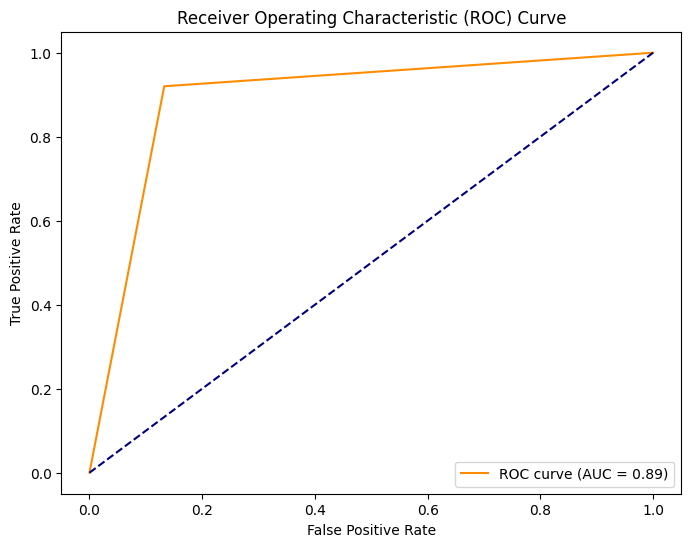

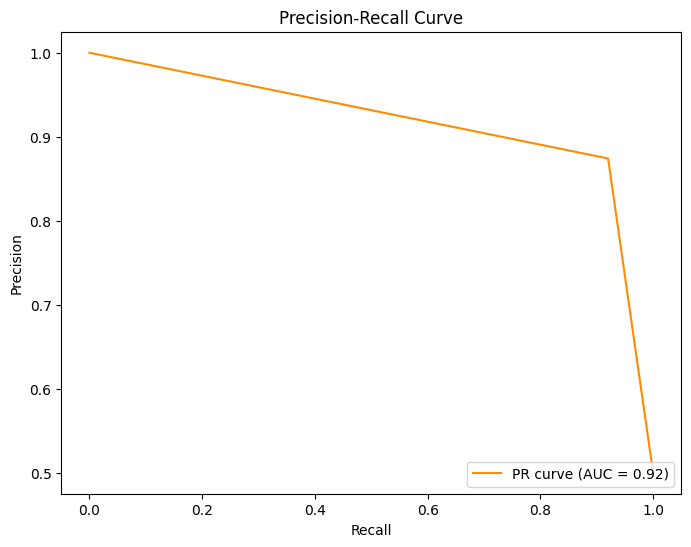

In [30]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

cm = confusion_matrix(test_labels,updated_predicted_labels)

# Compute false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds_roc = roc_curve(test_labels,updated_predicted_labels)

# Compute precision, recall, and thresholds for Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(test_labels,updated_predicted_labels)

# Compute AUC for ROC curve and Precision-Recall curve
roc_auc = auc(fpr, tpr)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='darkorange', label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()






In [23]:
print(type(predicted))

<class 'numpy.ndarray'>


In [29]:
import matplotlib.pyplot as plt

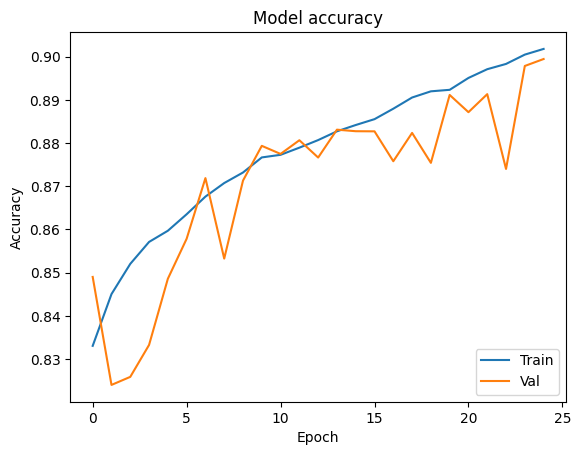

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

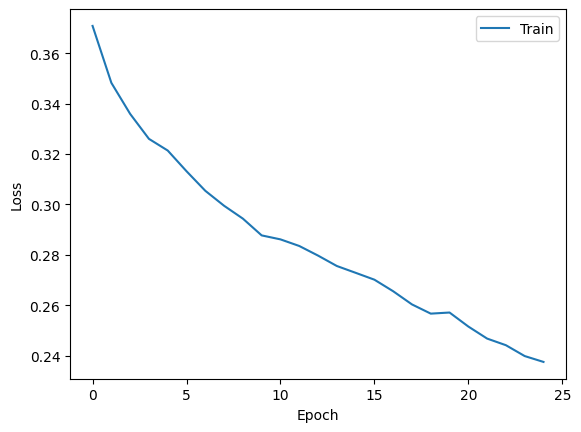

In [ ]:
plt.plot(hist.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
model.save_weights('my_model_weights.h5')

In [ ]:
model.load_weights('my_model_weights.h5')

In [ ]:
import pickle
file = open('my_model3', 'wb')

In [ ]:
pickle.dump(model, file)

In [ ]:
file.close()

In [10]:
import pickle

# assuming your pkl file is named "filename.pkl"
with open('my_model.pkl', 'rb') as f:
    model = pickle.load(f)
